In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Training Data Preliminary Details

In [2]:
train_df = pd.read_csv('./dataset/yds_train2018.csv')
print(train_df.head())
print(train_df.info())
print(train_df.describe())
train_df = train_df.drop(['Merchant_ID','Week','S_No'],axis=1)
train_df = train_df.groupby(['Year','Month','Country','Product_ID'],as_index=False).agg({'Sales':'sum'})
print(train_df.loc[train_df.Product_ID==4,:])
train_df['Day'] = 1
train_df['Date']= pd.to_datetime(train_df.Year*10000+train_df.Month*100+train_df.Day,format='%Y%m%d')
print(train_df.info())

   S_No  Year  Month  Week Merchant_ID  Product_ID    Country     Sales
0     1  2013      1     1     ar00001           1  Argentina  157500.0
1     2  2013      1     1     ar00003           1  Argentina   39375.0
2     3  2013      1     1     ar00004           1  Argentina   15750.0
3     4  2013      1     1     ar00007           1  Argentina   47250.0
4     5  2013      1     1     ar00008           1  Argentina  283500.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79072 entries, 0 to 79071
Data columns (total 8 columns):
S_No           79072 non-null int64
Year           79072 non-null int64
Month          79072 non-null int64
Week           79072 non-null int64
Merchant_ID    79072 non-null object
Product_ID     79072 non-null int64
Country        79072 non-null object
Sales          79072 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ MB
None
              S_No          Year         Month          Week    Product_ID  \
count  79072.00000  790

#### Inferences from train_df
- There are essentially no null values in all columns(inferred from train_df.info())
- Years from 2013 to 2014
- Month range from 1 to 12
- Week range from 1 to 53
- Product ID range between 1 to 5. Whether they are serially ordered or not will be seen in further code.
- It is also seen that minimum sales is negative which is not possible, this has to be handled.

### Test Data Preliminary Details

In [3]:
test_df = pd.read_csv('./dataset/yds_test2018.csv')
print(test_df.head())
print(test_df.info())
print(test_df.describe())
test_df_ori_years = test_df['Year']  #saved for the end :P
test_df.groupby(['Year','Month','Country','Product_ID']).agg({'Sales':'sum'})


    S_No  Year  Month  Product_ID    Country  Sales
0  79073  2016      4           1  Argentina    NaN
1  79074  2016      5           1  Argentina    NaN
2  79075  2016      6           1  Argentina    NaN
3  79076  2016      7           1  Argentina    NaN
4  79077  2016      8           1  Argentina    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
S_No          105 non-null int64
Year          105 non-null int64
Month         105 non-null int64
Product_ID    105 non-null int64
Country       105 non-null object
Sales         0 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 5.0+ KB
None
               S_No         Year       Month  Product_ID  Sales
count    105.000000   105.000000  105.000000  105.000000    0.0
mean   79125.000000  2016.171429    6.028571    2.428571    NaN
std       30.454885     0.508715    3.571945    1.254662    NaN
min    79073.000000  2015.000000    1.000000    1.000000    Na

Sales
Year Month Country   Product_ID       
2015 11    England   4             0.0
                     5             0.0
           Finland   4             0.0
     12    England   4             0.0
                     5             0.0
           Finland   4             0.0
2016 1     England   4             0.0
                     5             0.0
           Finland   4             0.0
     2     England   4             0.0
                     5             0.0
           Finland   4             0.0
     3     England   4             0.0
                     5             0.0
           Finland   4             0.0
     4     Argentina 1             0.0
                     2             0.0
           Belgium   2             0.0
           Columbia  1             0.0
                     2             0.0
           Denmark   2             0.0
           England   4             0.0
                     5             0.0
           Finland   4             0.0
     5     Argentina 1             0.0
                     2             0.0
           Belgium   2             0.0
           Columbia  1             0.0
                     2             0.0
           Denmark   2             0.0
...                                ...
     12    Argentina 1             0.0
                     2             0.0
           Belgium   2             0.0
           Columbia  1             0.0
                     2             0.0
           Denmark   2             0.0
2017 1     Argentina 1             0.0
                     2             0.0
                     3             0.0
           Belgium   2             0.0
           Columbia  1             0.0
                     2             0.0
                     3             0.0
           Denmark   2             0.0
     2     Argentina 1             0.0
                     2             0.0
                     3             0.0
           Belgium   2             0.0
           Columbia  1             0.0
                     2             0.0
                     3             0.0
           Denmark   2             0.0
     3     Argentina 1             0.0
                     2             0.0
                     3             0.0
           Belgium   2             0.0
           Columbia  1             0.0
                     2             0.0
                     3             0.0
           Denmark   2             0.0

[105 rows x 1 columns]

#### Inferences from test_df
- There are essentially no null values in all columns(inferred from test_df.info())
- Years from 2015 to 2017 
- Month range from 1 to 12
- Week column not present in test data.
- Product ID range between 1 to 5. Looks like there is no extra product in product_id of test data.
- Although there is no merchant_id in test data.
- Sales is NaN because it is to be determined through model.

### Promo expense Data Preliminary Details

In [4]:
promo_expense_df = pd.read_csv('./dataset/promotional_expense.csv')
print(promo_expense_df.head())
print(promo_expense_df.info())
print(promo_expense_df.describe())
promo_expense_df['Day'] = 1
promo_expense_df['Date']= pd.to_datetime(promo_expense_df.Year*10000+promo_expense_df.Month*100+promo_expense_df.Day,format='%Y%m%d')
promo_expense_df.groupby(['Year','Month','Country','Product_Type']).agg({'Expense_Price':'sum'})
#This will show the uniqueness of the table with respect to the above fields

   Year  Month    Country  Product_Type  Expense_Price
0  2013      1  Argentina             1      14749.307
1  2013      1  Argentina             2       1329.374
2  2013      1    Belgium             2        249.590
3  2013      1   Columbia             1       1893.122
4  2013      1   Columbia             2       1436.726
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 5 columns):
Year             435 non-null int64
Month            435 non-null int64
Country          435 non-null object
Product_Type     435 non-null int64
Expense_Price    435 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.1+ KB
None
              Year       Month  Product_Type  Expense_Price
count   435.000000  435.000000    435.000000     435.000000
mean   2014.551724    6.193103      2.457471    9235.699600
std       1.192900    3.484587      1.307514   18254.703304
min    2013.000000    1.000000      1.000000     153.179000
25%    2014.000

Expense_Price
Year Month Country   Product_Type               
2013 1     Argentina 1                 14749.307
                     2                  1329.374
           Belgium   2                   249.590
           Columbia  1                  1893.122
                     2                  1436.726
           Denmark   2                 43843.906
           England   4                   183.482
                     5                   330.367
           Finland   4                   750.618
     2     Argentina 1                 12187.566
                     2                  1315.006
           Belgium   2                   309.340
           Columbia  1                  1977.945
                     2                  1250.836
           Denmark   2                 37731.350
           England   4                   170.041
                     5                   307.268
           Finland   4                   809.129
     3     Argentina 1                 13076.579
                     2                  1192.655
           Belgium   2                   226.664
           Columbia  1                  2033.220
                     2                  1407.936
           Denmark   2                 40274.631
           England   4                   180.388
                     5                   318.857
           Finland   4                  1310.457
     4     Argentina 1                 14377.199
                     2                  1658.633
           Belgium   2                   317.763
...                                          ...
2016 11    Argentina 1                 10381.438
                     2                  3567.157
           Belgium   2                   771.520
           Columbia  1                  1691.494
                     2                  3728.492
           Denmark   2                 71397.279
     12    Argentina 1                  6865.382
                     2                  3616.041
           Belgium   2                   829.174
           Columbia  1                  1660.750
                     2                  3454.903
           Denmark   2                 70794.598
2017 1     Argentina 1                 10704.394
                     2                  3652.529
           Belgium   2                   726.143
           Columbia  1                  1472.171
                     2                  3738.000
           Denmark   2                 61985.791
     2     Argentina 1                  7253.269
                     2                  3250.009
           Belgium   2                   617.332
           Columbia  1                  1544.051
                     2                  3303.168
           Denmark   2                 57087.558
     3     Argentina 1                  8427.013
                     2                  2951.466
           Belgium   2                   497.232
           Columbia  1                  1843.579
                     2                  3923.139
           Denmark   2                 67228.892

[435 rows x 1 columns]

### Inferences from promo expense data
- Year range between 2015 and 2017. Therefore, use this for both training and testing data.
- Looks like Product Type and Product ID are the same thing.
- No null values.

### Holiday Data Preliminary Details

In [5]:
holiday_df = pd.read_excel('./dataset/holidays.xlsx')
print(holiday_df)
print(holiday_df.info())
print(holiday_df.describe())
holiday_df['Date']= pd.to_datetime(holiday_df.Date,format='%Y, %m, %d')
holiday_df['Month']  = holiday_df['Date'].dt.month
holiday_df['Year'] = holiday_df['Date'].dt.year
holiday_df['Fest_count'] = 1 

             Date  Country                 Holiday     Holiday_Trans
0      2014, 1, 1  Denmark               Nytårsdag      New Year Day
1     2014, 4, 17  Denmark             Skærtorsdag   Maundy Thursday
2     2014, 4, 18  Denmark              Langfredag       Good Friday
3     2014, 4, 20  Denmark                Påskedag     Easter Sunday
4     2014, 4, 21  Denmark          Anden påskedag     Easter Monday
5     2014, 5, 16  Denmark           Store bededag        Big bedday
6     2014, 5, 29  Denmark   Kristi himmelfartsdag  Christ Ascension
7      2014, 6, 8  Denmark                Pinsedag         Pentecost
8      2014, 6, 9  Denmark          Anden pinsedag       Whit Monday
9    2014, 12, 25  Denmark                 Juledag     Christmas Day
10   2014, 12, 26  Denmark           Anden juledag        Boxing Day
11     2011, 1, 1  Denmark               Nytårsdag      New Year Day
12    2011, 4, 21  Denmark             Skærtorsdag   Maundy Thursday
13    2011, 4, 22  Denmark        

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
# X = holiday_df['Holiday_Trans'].str.lower()
# df = pd.get_dummies(X)
# print(df.info())
# df['Holiday_Trans'] = holiday_df['Holiday_Trans']
# df['Country'] = holiday_df['Country']
# df['Year'] = holiday_df['Year']
# df['Month'] = holiday_df['Month']
# df['Date'] = holiday_df['Date']
vec = TfidfVectorizer(stop_words='english',tokenizer=LemmaTokenizer(),ngram_range=(2,2))
X = vec.fit_transform(holiday_df['Holiday_Trans'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df['Holiday_Trans'] = holiday_df['Holiday_Trans']
df['Country'] = holiday_df['Country']
df['Year'] = holiday_df['Year']
df['Month'] = holiday_df['Month']
df['Date'] = holiday_df['Date']
# df = df.drop(['.'],axis=1)
inv_x = vec.inverse_transform(X)

for i in df.columns:
    print(i)

[nltk_data] Downloading package punkt to /home/lenovo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lenovo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
ascension day
ascent lord
bank holiday
battle boyacá
big bedday
body christ
boxing day
carnival day
christ ascension
christmas day
christmas eve
cultural diversity
d josé
d manuel
day fallen
day magi
day memory
day pas
day respect
day revolution
day veteran
diamond jubilee
discovery america
easter day
easter monday
easter sunday
elizabeth ii
falklands war
fallen falklands
general d
general martín
good friday
holy week
immaculate conception
immortality general
independence cartagena
independence day
joseph day
josé san
jubilee elizabeth
jueves santo
labor day
labour day
late summer
manuel belgrano
martín miguel
maundy thursday
memory truth
midsummer day
midsummer eve
miguel güemes
national day
national holiday
national sovereignty
new year
olh ascensi

In [7]:
# df['christmas'] = df['christmas'] + df['christmas '] + df['christmas day']
# df['ascension'] += df['ascension day'] + df['ascent of the lord '] + df['olh ascension day']
# df['labor day '] += df['labour day'] + df['first of may'] + df['may day']
# df['easter day'] += df['easter day '] + df['easter sunday'] + df['easter monday']
# df['new year day'] += df['new years day']
# df['good friday'] +=df['good friday ']
# df['maundy thursday']+= df['jueves santo ']
# df = df.drop(['christmas ','christmas day','ascension day','ascent of the lord ','olh ascension day','labour day','first of may','may day','easter day ','easter sunday','easter monday','new years day','good friday ','jueves santo '],axis=1)

In [8]:
holiday_df = pd.merge(holiday_df,df,how='left',on=['Date','Holiday_Trans','Month','Year','Country'])

In [9]:
df = df.drop(['Year','Country','Month','Date','Holiday_Trans'],axis=1)
aggregate_keys = df.columns.tolist()
aggregate_keys.append('Fest_count')
aggregate_values = ['median'] * df.columns.size
aggregate_values.append('sum')
dict_agg = dict(zip(aggregate_keys,aggregate_values))

aggregate_keys.remove('Fest_count')
print(aggregate_keys)

['ascension day', 'ascent lord', 'bank holiday', 'battle boyacá', 'big bedday', 'body christ', 'boxing day', 'carnival day', 'christ ascension', 'christmas day', 'christmas eve', 'cultural diversity', 'd josé', 'd manuel', 'day fallen', 'day magi', 'day memory', 'day pas', 'day respect', 'day revolution', 'day veteran', 'diamond jubilee', 'discovery america', 'easter day', 'easter monday', 'easter sunday', 'elizabeth ii', 'falklands war', 'fallen falklands', 'general d', 'general martín', 'good friday', 'holy week', 'immaculate conception', 'immortality general', 'independence cartagena', 'independence day', 'joseph day', 'josé san', 'jubilee elizabeth', 'jueves santo', 'labor day', 'labour day', 'late summer', 'manuel belgrano', 'martín miguel', 'maundy thursday', 'memory truth', 'midsummer day', 'midsummer eve', 'miguel güemes', 'national day', 'national holiday', 'national sovereignty', 'new year', 'olh ascension', 'pas immortality', 'pedro y', 'respect cultural', 'sacred heart', 's

In [10]:
temp_fest = holiday_df.groupby(['Country','Year','Month'],as_index=False).agg(dict_agg)
train_df = pd.merge(train_df,temp_fest,how='left')
test_df = pd.merge(test_df,temp_fest,how='left')


In [11]:
# print(train_df.loc[train_df['san martin']>0,['san martin','josé san','d josé','general d','immortality general','pas immortality','day pas']])
print(train_df.head())
# print(train_df.duplicated().value_counts())

   Year  Month    Country  Product_ID        Sales  Day       Date  \
0  2013      1  Argentina           1  34346025.00    1 2013-01-01   
1  2013      1  Argentina           2   2751851.48    1 2013-01-01   
2  2013      1    Belgium           2    314850.13    1 2013-01-01   
3  2013      1   Columbia           1   3947356.31    1 2013-01-01   
4  2013      1   Columbia           2   2885137.06    1 2013-01-01   

   ascension day  ascent lord  bank holiday     ...      truth justice  \
0            0.0          0.0           0.0     ...                0.0   
1            0.0          0.0           0.0     ...                0.0   
2            0.0          0.0           0.0     ...                0.0   
3            0.0          0.0           0.0     ...                0.0   
4            0.0          0.0           0.0     ...                0.0   

   veteran day  veteran fallen  war holy  wedding william  whit monday  \
0          0.0             0.0       0.0              0.0   

### Holiday data inferences
- Date is given in format year, day, month. Convert it using pd.to_datetime()
- No null values.

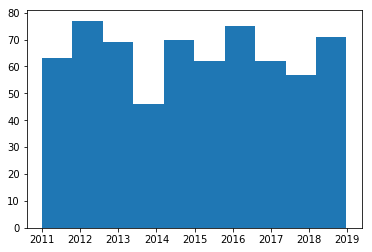

In [12]:
plt.hist(holiday_df['Date'])
plt.show()

<b>Note that Product ID, Product Type are of dtype:int64. They can be treated as categories.<br> Thus convert it to dtype:object</b>

In [13]:
train_df['Product_ID'] = train_df.Product_ID.astype('object')
test_df['Product_ID'] = test_df.Product_ID.astype('object')

In [14]:
#Find the different unique categories in each of these fields
print("Countries in train:")
print(train_df.Country.unique())
print("Countries in test:")
print(test_df.Country.unique())
print("Product IDs in train:")
print(train_df.Product_ID.unique())
print("Product IDs in test:")
print(train_df.Product_ID.unique())
print("Product Types:")
print(promo_expense_df.Product_Type.unique())


promo_expense_df = promo_expense_df.rename(columns = {'Product_Type':'Product_ID'})

Countries in train:
['Argentina' 'Belgium' 'Columbia' 'Denmark' 'England' 'Finland']
Countries in test:
['Argentina' 'Belgium' 'Columbia' 'Denmark' 'England' 'Finland']
Product IDs in train:
[1 2 4 5 3]
Product IDs in test:
[1 2 4 5 3]
Product Types:
[1 2 4 5]


In [15]:
promo_expense_df['Product_ID'] = promo_expense_df.Product_ID.astype('object')
temp_promo = promo_expense_df.groupby(['Year','Month','Country','Product_ID'],as_index=False).agg({'Expense_Price':'sum'})
temp_promo['Product_ID'] = temp_promo.Product_ID.astype('object')
train_df = pd.merge(train_df,temp_promo,how='left')
test_df = pd.merge(test_df,temp_promo,how='left')

In [16]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 86 columns):
Year                      388 non-null int64
Month                     388 non-null int64
Country                   388 non-null object
Product_ID                388 non-null object
Sales                     388 non-null float64
Day                       388 non-null int64
Date                      388 non-null datetime64[ns]
ascension day             263 non-null float64
ascent lord               263 non-null float64
bank holiday              263 non-null float64
battle boyacá             263 non-null float64
big bedday                263 non-null float64
body christ               263 non-null float64
boxing day                263 non-null float64
carnival day              263 non-null float64
christ ascension          263 non-null float64
christmas day             263 non-null float64
christmas eve             263 non-null float64
cultural diversity        263 non-null float64
d j

### Let's map years to serial numbers. i.e {2013:1,2014:2,2015:3,etc.}

In [17]:
serial_years ={2013:1,2014:2,2015:3,2016:4,2017:5}
train_df.replace(serial_years,inplace=True)
test_df.replace(serial_years,inplace=True)
temp_fest.replace(serial_years,inplace=True)

### Train and Test data after encoding years serially

In [18]:
print(train_df.head())
print("\n")
print(test_df.head())

   Year  Month    Country  Product_ID        Sales  Day       Date  \
0     1      1  Argentina           1  34346025.00    1 2013-01-01   
1     1      1  Argentina           2   2751851.48    1 2013-01-01   
2     1      1    Belgium           2    314850.13    1 2013-01-01   
3     1      1   Columbia           1   3947356.31    1 2013-01-01   
4     1      1   Columbia           2   2885137.06    1 2013-01-01   

   ascension day  ascent lord  bank holiday      ...        veteran day  \
0            0.0          0.0           0.0      ...                0.0   
1            0.0          0.0           0.0      ...                0.0   
2            0.0          0.0           0.0      ...                0.0   
3            0.0          0.0           0.0      ...                0.0   
4            0.0          0.0           0.0      ...                0.0   

   veteran fallen  war holy  wedding william  whit monday  william catherine  \
0             0.0       0.0              0.0    

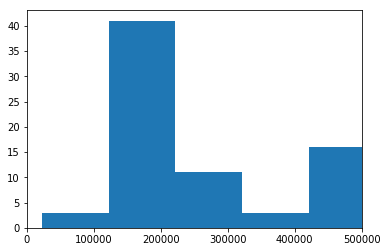

In [19]:
plt.hist(train_df['Sales'],bins=2000)
plt.xlim(-1,0.5e6)
# plt.ylim(0,12500)
plt.show()

In [20]:
aggregate_sales_yearly = train_df.groupby(['Year','Product_ID'],as_index=True).agg({'Sales':'sum'})
aggregate_sales_yearly = aggregate_sales_yearly.unstack()
train_df['Product_ID'] = train_df.Product_ID.astype('object')

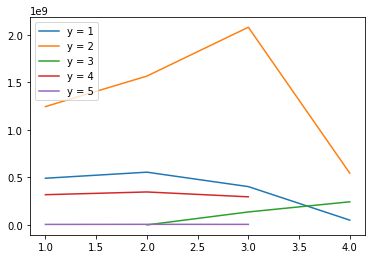

In [21]:
plt.plot(aggregate_sales_yearly.index.values,aggregate_sales_yearly['Sales'])
plt.legend(['y = 1', 'y = 2', 'y = 3', 'y = 4','y = 5'], loc='upper left')
plt.show()


In [22]:
aggregate_sales_monthly = train_df.groupby(['Date','Product_ID'],as_index=True).agg({'Sales':'sum'})
aggregate_sales_monthly = aggregate_sales_monthly.unstack()
train_df['Product_ID'] = train_df.Product_ID.astype('object')

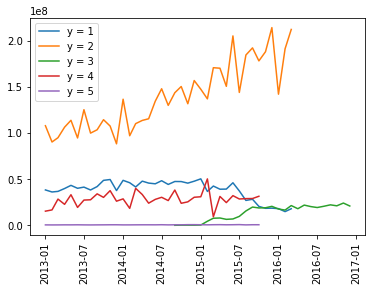

In [23]:
plt.plot(aggregate_sales_monthly.index.values,aggregate_sales_monthly['Sales'])
plt.xticks(rotation=90)
plt.legend(['y = 1', 'y = 2', 'y = 3', 'y = 4','y = 5'], loc='upper left')
plt.show()

In [24]:
argentina_sale = train_df.loc[train_df.Country=='Argentina'].groupby(['Date','Product_ID'],as_index=True).agg({'Sales':'sum'})
argentina_sale = argentina_sale.unstack()

train_df['Product_ID'] = train_df.Product_ID.astype('object')
belgium_sale = train_df.loc[train_df.Country=='Belgium'].groupby(['Date','Product_ID'],as_index=True).agg({'Sales':'sum'})
belgium_sale = belgium_sale.unstack()
train_df['Product_ID'] = train_df.Product_ID.astype('object')
columbia_sale = train_df.loc[train_df.Country=='Columbia'].groupby(['Date','Product_ID'],as_index=True).agg({'Sales':'sum'})
columbia_sale = columbia_sale.unstack()
train_df['Product_ID'] = train_df.Product_ID.astype('object')
finland_sale = train_df.loc[train_df.Country=='Finland'].groupby(['Date','Product_ID'],as_index=True).agg({'Sales':'sum'})
finland_sale = finland_sale.unstack()
train_df['Product_ID'] = train_df.Product_ID.astype('object')
denmark_sale = train_df.loc[train_df.Country=='Denmark'].groupby(['Date','Product_ID'],as_index=True).agg({'Sales':'sum'})
denmark_sale = denmark_sale.unstack()
train_df['Product_ID'] = train_df.Product_ID.astype('object')
england_sale = train_df.loc[train_df.Country=='England'].groupby(['Date','Product_ID'],as_index=True).agg({'Sales':'sum'})
england_sale = england_sale.unstack()
train_df['Product_ID'] = train_df.Product_ID.astype('object')

print(argentina_sale.head())
print(belgium_sale.head())
print(columbia_sale.head())
print(denmark_sale.head())
print(england_sale.head())
print(finland_sale.head())


                 Sales                
Product_ID           1           2   3
Date                                  
2013-01-01  34346025.0  2751851.48 NaN
2013-02-01  32005575.0  2804313.12 NaN
2013-03-01  32530050.0  2573004.98 NaN
2013-04-01  35588700.0  3436237.42 NaN
2013-05-01  38789100.0  3772468.84 NaN
                Sales
Product_ID          2
Date                 
2013-01-01  314850.13
2013-02-01  435185.52
2013-03-01  268694.09
2013-04-01  461560.40
2013-05-01  464857.26
                 Sales                
Product_ID           1           2   3
Date                                  
2013-01-01  3947356.31  2885137.06 NaN
2013-02-01  4074073.20  2481817.06 NaN
2013-03-01  4189422.98  2821691.18 NaN
2013-04-01  4229307.08  3149451.18 NaN
2013-05-01  4452229.12  3389234.12 NaN
                   Sales
Product_ID             2
Date                    
2013-01-01  1.018476e+08
2013-02-01  8.445781e+07
2013-03-01  8.915608e+07
2013-04-01  9.916639e+07
2013-05-01  1.060422e+08


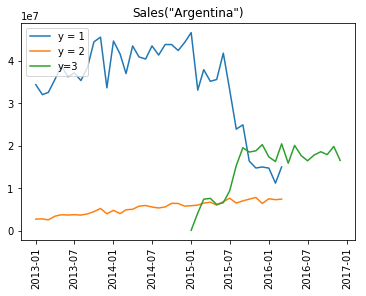

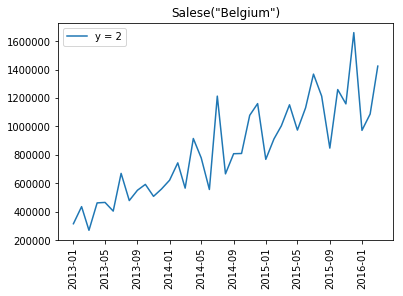

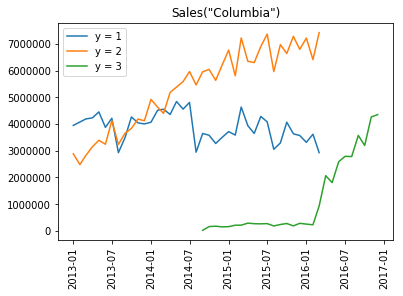

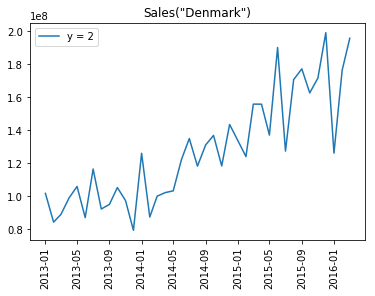

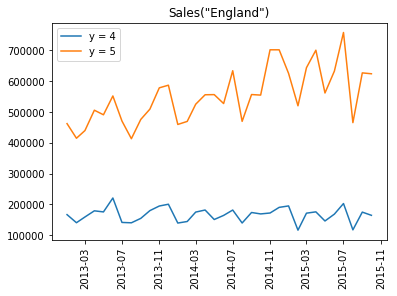

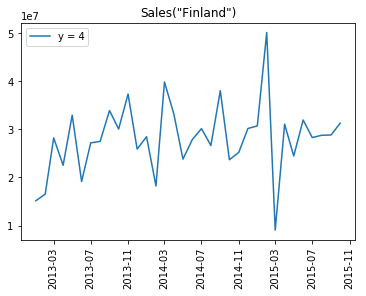

In [25]:
plt.plot(argentina_sale.index.values,argentina_sale['Sales'])
plt.xticks(rotation=90)
plt.legend(['y = 1', 'y = 2','y=3'], loc='upper left')
plt.title('Sales(\"Argentina\")')
plt.show()

plt.plot(belgium_sale.index.values,belgium_sale['Sales'])
plt.xticks(rotation=90)
plt.legend(['y = 2'], loc='upper left')
plt.title('Salese(\"Belgium\")')
plt.show()

plt.plot(columbia_sale.index.values,columbia_sale['Sales'])
plt.xticks(rotation=90)
plt.legend(['y = 1','y = 2','y = 3'], loc='upper left')
plt.title('Sales(\"Columbia\")')
plt.show()

plt.plot(denmark_sale.index.values,denmark_sale['Sales'])
plt.xticks(rotation=90)
plt.legend(['y = 2'], loc='upper left')
plt.title('Sales(\"Denmark\")')
plt.show()

plt.plot(england_sale.index.values,england_sale['Sales'])
plt.xticks(rotation=90)
plt.legend(['y = 4','y = 5'], loc='upper left')
plt.title('Sales(\"England\")')
plt.show()

plt.plot(finland_sale.index.values,finland_sale['Sales'])
plt.xticks(rotation=90)
plt.legend(['y = 4'], loc='upper left')
plt.title('Sales(\"Finland\")')
plt.show()

- From the above graphs we can make out that Product_ID 2 is the most popular. It also follows an upward trend.
- Product 1 and 4 are kind of stationary. 
- Product 3 sales are not high but it has an upward trend.
- Product 5 does not sell much.

- We see that there is a feature in promo expenses that is not there in our train data.
- We will try to predict it in the following tables from promo expenses. 

In [26]:
argentina_expense = promo_expense_df.loc[promo_expense_df.Country=='Argentina'].groupby(['Date','Product_ID'],as_index=True).agg({'Expense_Price':'sum'})
argentina_expense = argentina_expense.unstack()
promo_expense_df['Product_ID'] = promo_expense_df.Product_ID.astype('object')
belgium_expense = promo_expense_df.loc[promo_expense_df.Country=='Belgium'].groupby(['Date','Product_ID'],as_index=True).agg({'Expense_Price':'sum'})
belgium_expense = belgium_expense.unstack()
promo_expense_df['Product_ID'] = promo_expense_df.Product_ID.astype('object')
columbia_expense = promo_expense_df.loc[promo_expense_df.Country=='Columbia'].groupby(['Date','Product_ID'],as_index=True).agg({'Expense_Price':'sum'})
columbia_expense = columbia_expense.unstack()
promo_expense_df['Product_ID'] = promo_expense_df.Product_ID.astype('object')
finland_expense = promo_expense_df.loc[promo_expense_df.Country=='Finland'].groupby(['Date','Product_ID'],as_index=True).agg({'Expense_Price':'sum'})
finland_expense = finland_expense.unstack()
promo_expense_df['Product_ID'] = promo_expense_df.Product_ID.astype('object')
denmark_expense = promo_expense_df.loc[promo_expense_df.Country=='Denmark'].groupby(['Date','Product_ID'],as_index=True).agg({'Expense_Price':'sum'})
denmark_expense = denmark_expense.unstack()
promo_expense_df['Product_ID'] = promo_expense_df.Product_ID.astype('object')
england_expense = promo_expense_df.loc[promo_expense_df.Country=='England'].groupby(['Date','Product_ID'],as_index=True).agg({'Expense_Price':'sum'})
england_expense = england_expense.unstack()
promo_expense_df['Product_ID'] = promo_expense_df.Product_ID.astype('object')

print(columbia_expense.head())

           Expense_Price          
Product_ID             1         2
Date                              
2013-01-01      1893.122  1436.726
2013-02-01      1977.945  1250.836
2013-03-01      2033.220  1407.936
2013-04-01      2022.229  1558.911
2013-05-01      2114.103  1667.862


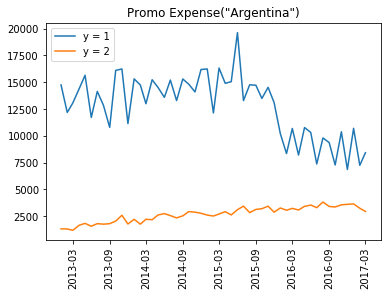

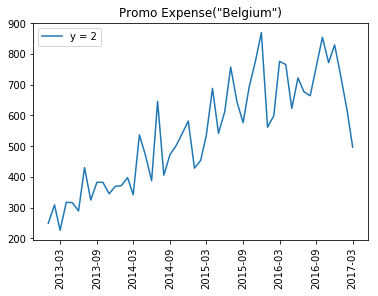

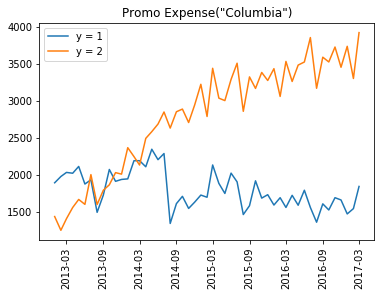

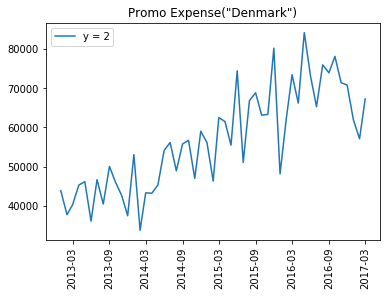

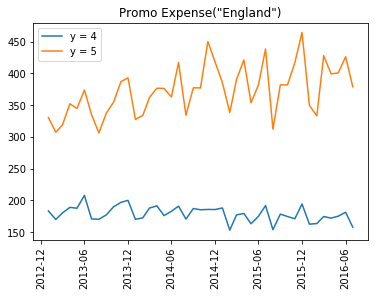

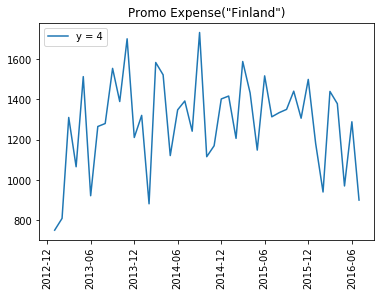

In [27]:
plt.plot(argentina_expense.index.values,argentina_expense['Expense_Price'])
plt.xticks(rotation=90)
plt.legend(['y = 1', 'y = 2'], loc='upper left')
plt.title('Promo Expense(\"Argentina\")')
plt.show()

plt.plot(belgium_expense.index.values,belgium_expense['Expense_Price'])
plt.xticks(rotation=90)
plt.legend(['y = 2'], loc='upper left')
plt.title('Promo Expense(\"Belgium\")')
plt.show()

plt.plot(columbia_expense.index.values,columbia_expense['Expense_Price'])
plt.xticks(rotation=90)
plt.legend(['y = 1','y = 2'], loc='upper left')
plt.title('Promo Expense(\"Columbia\")')
plt.show()

plt.plot(denmark_expense.index.values,denmark_expense['Expense_Price'])
plt.xticks(rotation=90)
plt.legend(['y = 2'], loc='upper left')
plt.title('Promo Expense(\"Denmark\")')
plt.show()

plt.plot(england_expense.index.values,england_expense['Expense_Price'])
plt.xticks(rotation=90)
plt.legend(['y = 4','y = 5'], loc='upper left')
plt.title('Promo Expense(\"England\")')
plt.show()

plt.plot(finland_expense.index.values,finland_expense['Expense_Price'])
plt.xticks(rotation=90)
plt.legend(['y = 4'], loc='upper left')
plt.title('Promo Expense(\"Finland\")')
plt.show()

- From the argentina graph it is clearly seen that there is a point from where the trend of expense goes down for item 1. This can be correlated to the fact that there is no recorded sales post mid 2016 for that item. 
- There is also a correlation between the promo expense of item 2 and total sales.
- Similar trend and correlation observed in Belgium and Denmark expense and Total Sales of Item 2
- For expenses on item 4 and item 5 graphs are relatively stationary which can be correlated to the total sale line graph(which is also stationary)

In [28]:
corr_matrix = train_df.drop(['Month','Sales','Expense_Price','Fest_count','Day'],axis=1).corr()
delete_cols = corr_matrix.loc[corr_matrix.Year.isnull()==True,'Year'].index.values.tolist()
corr_matrix = corr_matrix.drop('Year',axis=1)
corr_matrix = train_df.drop(['Month','Sales','Expense_Price','Fest_count'],axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
train_df = train_df.drop(to_drop+delete_cols,axis=1)
test_df = test_df.drop(to_drop+delete_cols,axis=1)
print(to_drop)
for i in to_drop:
    print(i)
    aggregate_keys.remove(str(i))
for i in delete_cols:
    print(i)
    aggregate_keys.remove(str(i))


            

['christmas day', 'day respect', 'falklands war', 'fallen falklands', 'general d', 'general martín', 'immortality general', 'josé san', 'late summer', 'manuel belgrano', 'martín miguel', 'memory truth', 'midsummer eve', 'miguel güemes', 'national day', 'olh ascension', 'pas immortality', 'respect cultural', 'saint joseph', 'san martin', 'san pablo', 'san pedro', 'sovereignty day', 'summer bank', 'truth justice', 'veteran fallen', 'y san', 'year day']
christmas day
day respect
falklands war
fallen falklands
general d
general martín
immortality general
josé san
late summer
manuel belgrano
martín miguel
memory truth
midsummer eve
miguel güemes
national day
olh ascension
pas immortality
respect cultural
saint joseph
san martin
san pablo
san pedro
sovereignty day
summer bank
truth justice
veteran fallen
y san
year day
christmas eve
day fallen
diamond jubilee
easter sunday
elizabeth ii
holy week
jubilee elizabeth
maundy thursday
veteran day
war holy
wedding william
william catherine


### According to the definition of sMAPE in the problem statement explanation

In [29]:
def smape(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred) / (np.abs(y_true)+np.abs(y_pred)))*200

- Considering the fact that KNN is used as an imputer. We can make use of KNNRegressor for predicting values of Expense Price in both train and test.

#### Missing values imputation using KNN. (First check best parameter for model then predict)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 104
Data columns (total 12 columns):
Year                 435 non-null int64
Month                435 non-null int64
Country_Argentina    435 non-null uint8
Country_Belgium      435 non-null uint8
Country_Columbia     435 non-null uint8
Country_Denmark      435 non-null uint8
Country_England      435 non-null uint8
Country_Finland      435 non-null uint8
Product_ID_1         435 non-null uint8
Product_ID_2         435 non-null uint8
Product_ID_4         435 non-null uint8
Product_ID_5         435 non-null uint8
dtypes: int64(2), uint8(10)
memory usage: 14.4 KB
None


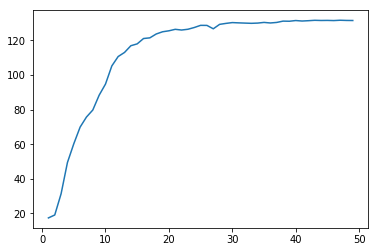

In [30]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import  StandardScaler, RobustScaler
X = train_df.loc[train_df.Expense_Price.isnull()==False,['Year','Month','Country','Product_ID','Expense_Price']]
X = pd.concat([X, test_df.loc[test_df.Expense_Price.isnull()==False,['Year','Month','Country','Product_ID','Expense_Price']]])
X = pd.get_dummies(X)
target = X['Expense_Price'] 
X = X.drop('Expense_Price',axis=1)

print(X.info())
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33)
smape_arr = []
x_param = []
for i in range(1,50):
    reg = KNeighborsRegressor(n_neighbors=i)
    x_param.append(i)
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    smape_arr.append(smape(y_test,pred))
   

plt.plot(x_param, smape_arr)
plt.show()


In [31]:
X = train_df.loc[train_df.Expense_Price.isnull()==False,['Year','Month','Country','Product_ID','Expense_Price']]
X = pd.concat([X, test_df.loc[test_df.Expense_Price.isnull()==False,['Year','Month','Country','Product_ID','Expense_Price']]])
X = pd.get_dummies(X)
target = X['Expense_Price'] 
X = X.drop('Expense_Price',axis=1)
X_test = test_df.loc[test_df.Expense_Price.isnull()==True,['Year','Month','Country','Product_ID']]   #X for predicting expenses from test Promo Expensr
X_train = train_df.loc[train_df.Expense_Price.isnull()==True,['Year','Month','Country','Product_ID']] #X for predicting expenses from train Promo Expense
X_test['Product_ID'] = X_test.Product_ID.astype('object')
X_test = pd.get_dummies(X_test)
X_train = pd.get_dummies(X_train)


X_test['Country_Belgium'] = 0
X_test['Country_Denmark'] = 0
X_test['Country_England'] = 0
X_test['Country_Finland'] = 0
X_test['Product_ID_1'] =0
X_test['Product_ID_2'] =0
X_test['Product_ID_4'] =0
X_test['Product_ID_5'] =0

X_train['Country_Belgium'] = 0
X_train['Country_Denmark'] = 0
X_train['Country_England'] = 0
X_train['Country_Finland'] = 0
X_train['Product_ID_1'] =0
X_train['Product_ID_2'] =0
X_train['Product_ID_4'] =0
X_train['Product_ID_5'] =0

X['Product_ID_3'] = 0


Y_test = test_df.loc[test_df.Expense_Price.isnull()==True,['Expense_Price']]
Y_train = train_df.loc[train_df.Expense_Price.isnull()==True,['Expense_Price']]
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X,target)
Y_train = reg.predict(X_train)
Y_test = reg.predict(X_test)


test_df.loc[test_df.Expense_Price.isnull()==True,['Expense_Price']] = Y_test  
train_df.loc[train_df.Expense_Price.isnull()==True,['Expense_Price']] = Y_train

print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 46 columns):
Year                      388 non-null int64
Month                     388 non-null int64
Country                   388 non-null object
Product_ID                388 non-null object
Sales                     388 non-null float64
Day                       388 non-null int64
Date                      388 non-null datetime64[ns]
ascension day             263 non-null float64
ascent lord               263 non-null float64
bank holiday              263 non-null float64
battle boyacá             263 non-null float64
big bedday                263 non-null float64
body christ               263 non-null float64
boxing day                263 non-null float64
carnival day              263 non-null float64
christ ascension          263 non-null float64
cultural diversity        263 non-null float64
d josé                    263 non-null float64
d manuel                  263 non-null float64
day

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 352
Data columns (total 47 columns):
Month                  353 non-null int64
christmas day          353 non-null float64
christmas eve          353 non-null float64
day fallen             353 non-null float64
day respect            353 non-null float64
diamond jubilee        353 non-null float64
easter sunday          353 non-null float64
elizabeth ii           353 non-null float64
falklands war          353 non-null float64
fallen falklands       353 non-null float64
general d              353 non-null float64
general martín         353 non-null float64
holy week              353 non-null float64
immortality general    353 non-null float64
josé san               353 non-null float64
jubilee elizabeth      353 non-null float64
late summer            353 non-null float64
manuel belgrano        353 non-null float64
martín miguel          353 non-null float64
maundy thursday        353 non-null float64
memory truth     

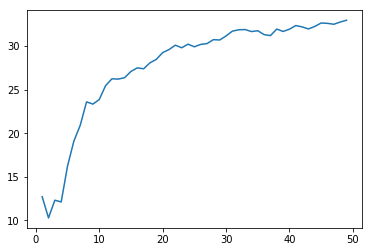

In [32]:
target = temp_fest['Fest_count']

X = pd.get_dummies(temp_fest)

X = X.drop(['Fest_count','Year']+aggregate_keys,axis=1)
print(X.info())
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33)
smape_arr = []
x_param = []
for i in range(1,50):
    reg = KNeighborsRegressor(n_neighbors=i)
    x_param.append(i)
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    smape_arr.append(smape(y_test,pred))
   

plt.plot(x_param, smape_arr)
plt.show()

In [33]:
train_pred_df = train_df.drop(['Sales','Day','Date','Year','Product_ID','Expense_Price']+aggregate_keys,axis=1)

train_x = train_pred_df.loc[train_pred_df.Fest_count.isnull()==False,:]
test_x = train_pred_df.loc[train_pred_df.Fest_count.isnull()==True,:]
train_y = train_x['Fest_count']
print(train_x.info())
print(test_x.info())
train_x = train_x.drop('Fest_count',axis=1)
test_x = test_x.drop('Fest_count',axis=1)


train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(train_x,train_y)
test_y = reg.predict(test_x)
train_df.loc[train_df.Fest_count.isnull()==True,'Fest_count'] = test_y

#===========================================================================================


<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 387
Data columns (total 3 columns):
Month         263 non-null int64
Country       263 non-null object
Fest_count    263 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 11 to 381
Data columns (total 3 columns):
Month         125 non-null int64
Country       125 non-null object
Fest_count    0 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB
None


In [34]:
test_pred_df = test_df.drop(['S_No','Sales','Year','Product_ID','Expense_Price']+aggregate_keys,axis=1)
train_x = test_pred_df.loc[test_pred_df.Fest_count.isnull()==False,:]
test_x = test_pred_df.loc[test_pred_df.Fest_count.isnull()==True,:]
train_y = train_x['Fest_count']
test_y = test_x['Fest_count']
train_x = train_x.drop('Fest_count',axis=1)
test_x = test_x.drop('Fest_count',axis=1)

train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(train_x,train_y)
test_y = reg.predict(test_x)
test_df.loc[test_df.Fest_count.isnull()==True,'Fest_count'] = test_y


In [35]:
aggregate_keys_q = []
for i in aggregate_keys:
    print(i)
    train_pred_df = train_df.drop(['Sales','Day','Date','Product_ID','Expense_Price','Fest_count','Year']+aggregate_keys,axis=1)
    train_pred_df[str(i)] = train_df[str(i)]
    train_x = train_pred_df.loc[train_pred_df[str(i)].isnull()==False,:]
    test_x = train_pred_df.loc[train_pred_df[str(i)].isnull()==True,:]
    train_y = train_x[str(i)]
    train_x = train_x.drop(str(i),axis=1)
    test_x = test_x.drop(str(i),axis=1)
    print(test_x.info())
    train_x = pd.get_dummies(train_x)
    test_x = pd.get_dummies(test_x)
    reg = KNeighborsRegressor(n_neighbors=3)
    reg.fit(train_x,train_y)
    test_y = reg.predict(test_x)
    train_df.loc[train_df[str(i)].isnull()==True,i] = test_y

print(train_df.info())

ascension day
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 11 to 381
Data columns (total 2 columns):
Month      125 non-null int64
Country    125 non-null object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB
None
ascent lord
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 11 to 381
Data columns (total 2 columns):
Month      125 non-null int64
Country    125 non-null object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB
None
bank holiday
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 11 to 381
Data columns (total 2 columns):
Month      125 non-null int64
Country    125 non-null object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB
None
battle boyacá
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 11 to 381
Data columns (total 2 columns):
Month      125 non-null int64
Country    125 non-null object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB
None
big bedday
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 46 columns):
Year                      388 non-null int64
Month                     388 non-null int64
Country                   388 non-null object
Product_ID                388 non-null object
Sales                     388 non-null float64
Day                       388 non-null int64
Date                      388 non-null datetime64[ns]
ascension day             388 non-null float64
ascent lord               388 non-null float64
bank holiday              388 non-null float64
battle boyacá             388 non-null float64
big bedday                388 non-null float64
body christ               388 non-null float64
boxing day                388 non-null float64
carnival day              388 non-null float64
christ ascension          388 non-null float64
cultural diversity        388 non-null float64
d josé                    388 non-null float64
d manuel                  388 non-null float64
day

In [36]:
for i in aggregate_keys:
    test_pred_df = test_df.drop(['S_No','Sales','Product_ID','Expense_Price','Fest_count','Year']+aggregate_keys,axis=1)
    test_pred_df[str(i)] = test_df[str(i)]
    
    train_x = test_pred_df.loc[test_pred_df[str(i)].isnull()==False,:]
    test_x = test_pred_df.loc[test_pred_df[str(i)].isnull()==True,:]
    train_y = train_x[str(i)]
    test_y = test_x[str(i)]
    train_x = train_x.drop(str(i),axis=1)
    test_x = test_x.drop(str(i),axis=1)
    

    train_x = pd.get_dummies(train_x)
    test_x = pd.get_dummies(test_x)

    reg = KNeighborsRegressor(n_neighbors=3)
    reg.fit(train_x,train_y)
    test_y = reg.predict(test_x)
    test_df.loc[test_df[str(i)].isnull()==True,str(i)] = test_y


In [37]:
print(test_df.info())
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 45 columns):
S_No                      105 non-null int64
Year                      105 non-null int64
Month                     105 non-null int64
Product_ID                105 non-null int64
Country                   105 non-null object
Sales                     0 non-null float64
ascension day             105 non-null float64
ascent lord               105 non-null float64
bank holiday              105 non-null float64
battle boyacá             105 non-null float64
big bedday                105 non-null float64
body christ               105 non-null float64
boxing day                105 non-null float64
carnival day              105 non-null float64
christ ascension          105 non-null float64
cultural diversity        105 non-null float64
d josé                    105 non-null float64
d manuel                  105 non-null float64
day magi                  105 non-null float64
day memory   

In [41]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = RobustScaler()

target = train_df['Sales']
print(X.info())
X = train_df.drop(['Date','Day','Month'],axis=1)
X.loc[:,X.columns.difference(['Country','Product'])] =scaler.fit_transform(X.loc[:,X.columns.difference(['Country','Product'])])
X = pd.get_dummies(X)
X = X.drop('Sales',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33)

smape_arr = []
x_param = []

criteria = ['mse','mae']
splitter_val = ['best','random']
min_samples_split = [2, 5, 10,15,20,25,30]
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64]
max_features_val = ['auto','sqrt','log2']
presort_val = [True,False]
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# MAE means mean absolute error. As our evaluation metric is SMAPE, It would be better to use MAE than MSE as criterion.
reg = RandomForestRegressor(n_estimators=100,min_samples_split=2, min_samples_leaf=2,max_features='auto',criterion='mse',bootstrap=True,oob_score=True)

# rs_reg = RandomizedSearchCV(estimator = reg,param_distributions=random_grid, n_iter = 10, cv = 4,verbose=2)
# rs_reg.fit(X_train,y_train)
# print(rs_reg.best_params_)

reg.fit(X_train,y_train)

pred = reg.predict(X_test)
#shows important features from random forest
feature_imp = dict(zip(reg.feature_importances_.tolist(),X_train.columns.tolist()))
print(feature_imp)
count=0 
for key in sorted(feature_imp.keys()): 
    print(str(count)+ " " + str(key) + ":" + feature_imp[key])
    count+=1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 47 columns):
Year                      388 non-null float64
Product_ID                388 non-null float64
ascension day             388 non-null float64
ascent lord               388 non-null float64
bank holiday              388 non-null float64
battle boyacá             388 non-null float64
big bedday                388 non-null float64
body christ               388 non-null float64
boxing day                388 non-null float64
carnival day              388 non-null float64
christ ascension          388 non-null float64
cultural diversity        388 non-null float64
d josé                    388 non-null float64
d manuel                  388 non-null float64
day magi                  388 non-null float64
day memory                388 non-null float64
day pas                   388 non-null float64
day revolution            388 non-null float64
day veteran               388 non-null float64
di

In [42]:
print(smape(y_test,pred))

17.021186583281096


In [43]:
target = test_df['Sales']
test_Sno = test_df['S_No']
x_test = test_df.drop(['S_No','Sales','Month'],axis=1)
y_train = train_df['Sales']

x_train = train_df.drop(['Sales','Day','Date','Month'],axis=1)
x_test['Product_ID'] = x_test.Product_ID.astype('object')
x_train.loc[:,x_train.columns.difference(['Country','Product'])] =scaler.fit_transform(x_train.loc[:,x_train.columns.difference(['Country','Product'])])
x_test.loc[:,x_test.columns.difference(['Country','Product'])] =scaler.fit_transform(x_test.loc[:,x_test.columns.difference(['Country','Product'])])
x_test = pd.get_dummies(x_test)
x_train = pd.get_dummies(x_train)
print(x_train.info())
print(x_test.info())

reg = RandomForestRegressor(n_estimators=100,min_samples_split=2, min_samples_leaf=2,max_features='auto',criterion='mse',bootstrap=True,oob_score=True)

reg.fit(x_train,y_train)
target = reg.predict(x_test)

test_df = test_df.drop(['Expense_Price']+aggregate_keys,axis=1)
test_df['Sales'] = target
test_df['Year'] = test_df_ori_years




<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 47 columns):
Year                      388 non-null float64
Product_ID                388 non-null float64
ascension day             388 non-null float64
ascent lord               388 non-null float64
bank holiday              388 non-null float64
battle boyacá             388 non-null float64
big bedday                388 non-null float64
body christ               388 non-null float64
boxing day                388 non-null float64
carnival day              388 non-null float64
christ ascension          388 non-null float64
cultural diversity        388 non-null float64
d josé                    388 non-null float64
d manuel                  388 non-null float64
day magi                  388 non-null float64
day memory                388 non-null float64
day pas                   388 non-null float64
day revolution            388 non-null float64
day veteran               388 non-null float64
di

In [44]:
final_df = test_df.drop(['Fest_count'],axis=1)
final_df.to_csv("sample_submission.csv",index=False)

# Final Submission